In [1]:
#Exercise 13
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
#subroutine to generate x_bar_N
def generate_x_bar_expo(N):
    x=[]
    for i in range(N):
        x.append(random.expovariate(1))      
    x_bar=np.mean(x)
    return x_bar

In [3]:
#example to use generate x_bar_N
generate_x_bar_expo(100)

0.92291758231267762

In [4]:
#subroutine to produce a histogram of distribution of X_bar, also add a fit line of standard gaussian
def dis_x_bar_centered(N, n):
    r=[]
    for i in range(n):
        x_bar=generate_x_bar_expo(N)
        r.append(math.sqrt(N)*(x_bar-1))
    fig = plt.figure()
    num_bins = 30
    n, bins, patches=plt.hist(r, num_bins, normed=1)
    y = mlab.normpdf(bins, 0, 1)
    plt.plot(bins, y, 'r--')
    plt.ylabel('Probability')
    return fig

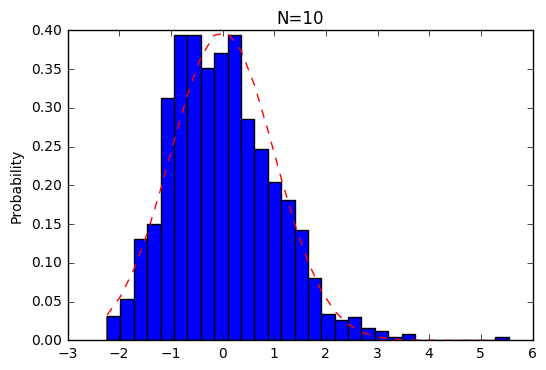

In [5]:
#histogram when N=100
dis_x_bar_centered(10, 1000)
plt.title("N=10")
plt.savefig("figure1.png")
plt.show()

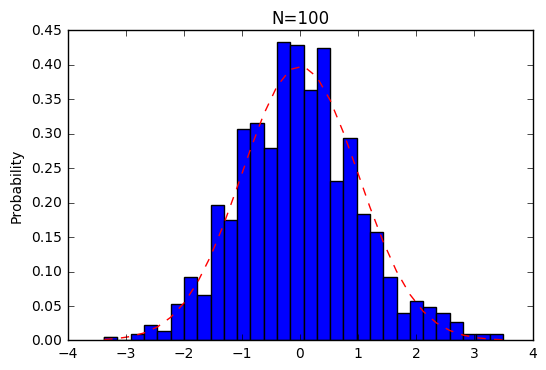

In [7]:
#histogram when N=100
dis_x_bar_centered(100, 1000)
plt.title("N=100")
plt.savefig("figure2.png")
plt.show()

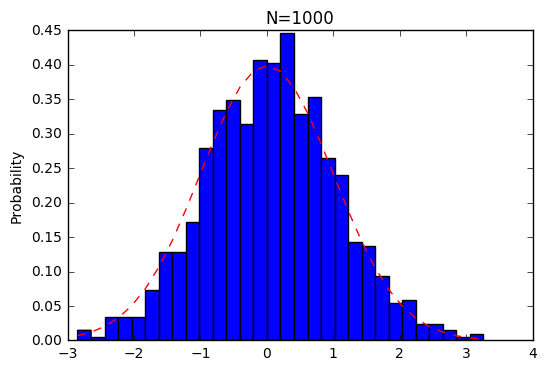

In [8]:
#histogram when N=1000
dis_x_bar_centered(1000, 1000)
plt.title("N=1000")
plt.savefig("figure3.png")
plt.show()

In [10]:
#routine to estimate QN
def QN(N, n):
    x=[]
    for i in range(n):
        x_bar=generate_x_bar_expo(N)
        x.append(int(x_bar>1.1))
    q=np.mean(x)
    return  q

In [14]:
#q is list of QN as N changes from 50 to 1500;
q=[]
for i in range(30):
    q.append(QN(50*(i+1),1000))
print q

[0.22900000000000001, 0.14699999999999999, 0.13200000000000001, 0.074999999999999997, 0.066000000000000003, 0.043999999999999997, 0.031, 0.019, 0.023, 0.014999999999999999, 0.012999999999999999, 0.01, 0.0050000000000000001, 0.0040000000000000001, 0.0050000000000000001, 0.0, 0.001, 0.0030000000000000001, 0.001, 0.002, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
#compute the rate of decay when N changes from 50 to 50*num
def decay_QN(num):
    r=[]
    q=[]
    n=[]
    for i in range(num):
        q.append(QN(50*(i+1),1000))
        if q[i]>0:
            r.append(math.log(q[i])/(50*(i+1)))
            n.append(50*(i+1))
    return [r,n]
#example of a list of rate of decay
d=decay_QN(50)

In [17]:
print d[0]

[-0.027967338847083197, -0.017957674906255938, -0.0149621078991338, -0.012505180158589419, -0.01132087134030567, -0.00991976548752604, -0.009661127869617073, -0.008851148622489157, -0.008584961869463809, -0.007926632599631393, -0.008199745465788666, -0.008047189562170503, -0.00849455525824961, -0.008298775700448612, -0.00774552398708537, -0.007768260123027739, -0.007311303645202578, -0.006454603322571142, -0.006907755278982137, -0.006006743720854032, -0.005313657906909336, -0.004186518350898265]


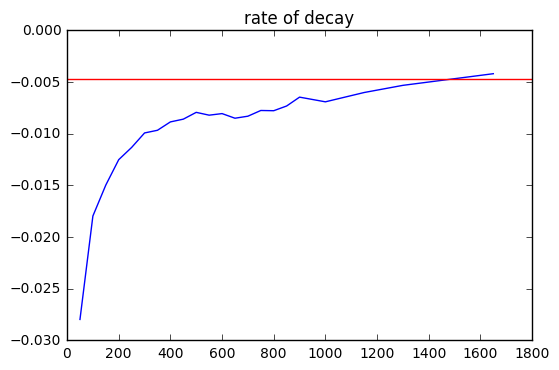

In [18]:
rate=-0.1+math.log(1.1)
plt.plot(d[1],d[0])
plt.axhline(y=rate,color='r')
plt.title("rate of decay")
plt.savefig("figure8.png")
plt.show()

In [20]:
#compute standard deviation of QN
def sd_QN(N, n):
    q=[]
    for i in range(100):
        q.append(QN(N, n))
    sd_q=np.std(q)
    return sd_q

In [21]:
#sd is a list of standard deviation of QN when N changes from 50 to 1000
sd=[]
for i in range(20):
    sd.append(sd_QN((50*i+50),1000))
print sd

[0.014264820363397499, 0.011610150731149014, 0.011431027950276389, 0.0080465831257745674, 0.0074954386129165241, 0.0069150488067691897, 0.0057037180855999533, 0.0054214758138351957, 0.0040976090589513294, 0.0039710326112989804, 0.0031331134674633153, 0.0026327931935493909, 0.0025588083163847974, 0.0020971170687398449, 0.0019029188106695464, 0.0014378803844548405, 0.0014618823482072695, 0.0015938632312717427, 0.0012449497981846496, 0.0010573079021741964]


In [22]:
#estimate rate of decay for $sd(Q_{N})$
def decay_sd_QN(num):
    r=[]
    sd=[]
    n=[]
    for i in range(num):
        sd.append(sd_QN((50*i+50),1000))
        if sd[i]>0:
            r.append(math.log(sd[i])/(50*(i+1)))
            n.append(50*(i+1))
    return [r,n]
ds=decay_sd_QN(30)

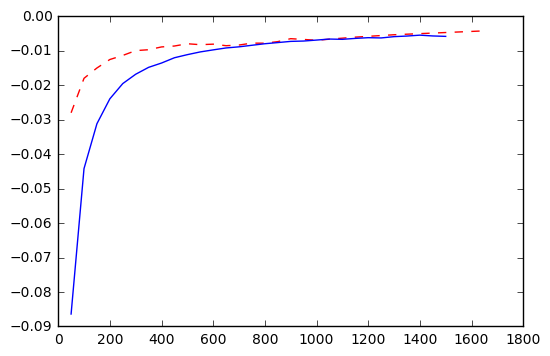

In [24]:
#red is rate of decay for Q_N; blue is for sd(Q_N)
plt.plot(d[1],d[0],"r--",ds[1], ds[0] )
plt.savefig("figure9.png")
plt.show()

In [64]:
#Exercise 16
#generate N samples
def generate_pi(N):
    u=[]
    x=[]
    for i in range(N):
        u.append(random.uniform(0,1))
        x.append(u[i]**2)
    return x

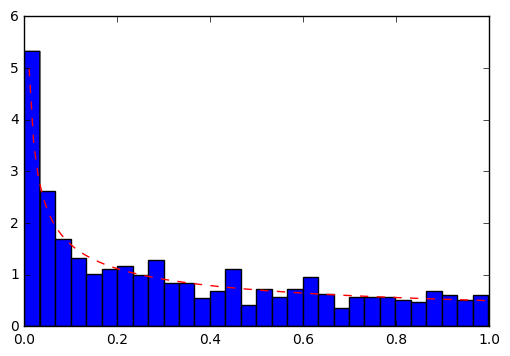

In [67]:
#generate 1000 samples
x=generate_pi(1000)
def expf(x):
    return 1/(2*np.sqrt(x))
xlab=np.linspace(0.01,1,100)
ylab=expf(xlab)
#histogram
plt.hist(x,30,normed=1)
plt.plot(xlab,ylab,"r--")
plt.savefig("figure4.png")
plt.show()

In [20]:
#Exercise 17
#generate 2_D gaussian distribution
def generate_Gaussian(n):
    u1=[]
    u2=[]
    x1=[]
    x2=[]
    for i in range(n):
        u1.append(random.uniform(0,1))
        u2.append(random.uniform(0,1))
        x1.append(math.sqrt(-2*math.log(u1[i]))*math.cos(2*math.pi*u2[i]))
        x2.append(math.sqrt(-2*math.log(u1[i]))*math.sin(2*math.pi*u2[i]))
    return [x1,x2]    

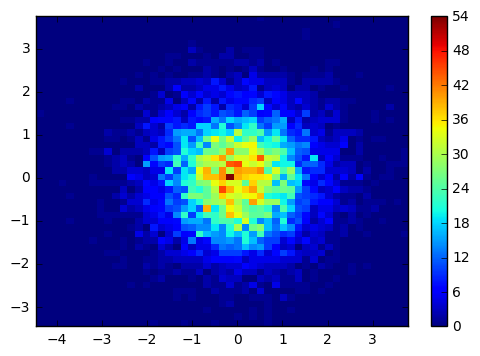

In [21]:
#generate 1000 samples
x=generate_Gaussian(10000)
#histogram
gridx = np.linspace(min(x[0]),max(x[0]),50)
gridy = np.linspace(min(x[1]),max(x[1]),50)
H, xedges, yedges=np.histogram2d(x[0],x[1], bins=[gridx, gridy])
plt.figure()
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(H.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto')
plt.colorbar()
plt.savefig("figure5.png")
plt.show()

In [22]:
#Exercise 18
#genrate uniform dis on unit disk
def generate_unitdisk(n):
    u1=[]
    u2=[]
    x1=[]
    x2=[]
    for i in range(n):
        u1.append(random.uniform(0,1))
        u2.append(random.uniform(0,1))
        x1.append(math.sqrt(u1[i])*math.cos(2*math.pi*u2[i]))
        x2.append(math.sqrt(u1[i])*math.sin(2*math.pi*u2[i]))
    return [x1,x2]  

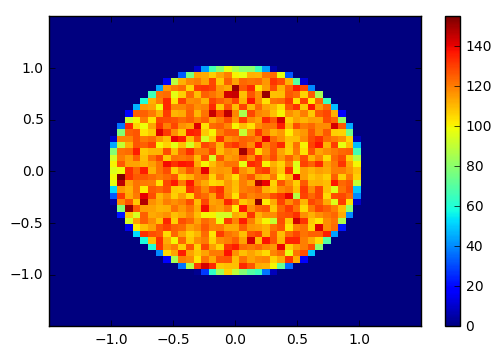

In [29]:
#generate 1000 samples
x=generate_unitdisk(100000)
#histogram
gridx = np.linspace(min(x[0])-0.5,max(x[0])+0.5,50)
gridy = np.linspace(min(x[1])-0.5,max(x[1])+0.5,50)
H, xedges, yedges=np.histogram2d(x[0],x[1], bins=[gridx, gridy])
plt.figure()
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(H.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto')
plt.colorbar()
plt.savefig("figure6.png")
plt.show()

In [5]:
#Exercise 19
#generate uniform dis on unit disk based on rejection method
def generate_unitdisk_r(K):
    u=random.uniform(0,1)
    K=4/math.pi
    x=random.uniform(0,1)*2-1
    y=random.uniform(0,1)*2-1
    i=1
    while (((x**2+y**2)<=1)/math.pi/K*4) < u:
        i=i+1
        x=random.uniform(0,1)*2-1
        y=random.uniform(0,1)*2-1
        u=random.uniform(0,1)
    return [x,y,i]


In [30]:
x1=[]
x2=[]
t=[]
for i in range(100000):
    x=generate_unitdisk_r(4/math.pi)
    x1.append(x[0])
    x2.append(x[1])
    t.append(x[2])

In [31]:
np.mean(t)

1.2725

In [32]:
4/math.pi

1.2732395447351628

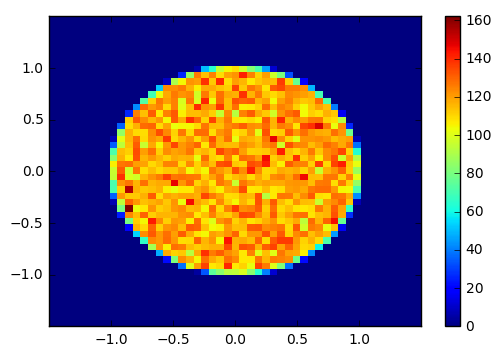

In [33]:
gridx = np.linspace(min(x1)-0.5,max(x1)+0.5,50)
gridy = np.linspace(min(x2)-0.5,max(x2)+0.5,50)
H, xedges, yedges=np.histogram2d(x1,x2, bins=[gridx, gridy])
plt.figure()
myextent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(H.T,origin='low',extent=myextent,interpolation='nearest',aspect='auto')
plt.colorbar()
plt.savefig("figure7.png")
plt.show()

In [37]:
import time
t1=time.time()
x1=[]
x2=[]
t=[]
for i in range(100000):
    generate_unitdisk_r(4/math.pi)
    x=generate_unitdisk_r(4/math.pi)
    x1.append(x[0])
    x2.append(x[1])
    t.append(x[2])
#t1 computes the executing time using rejection, t2 computes the executing time directly
    t1=time.time()-t1
t2=time.time()
x=generate_unitdisk(100000)
t2=time.time()-t2

In [38]:
print t1
print t2
print np.sum(t)

0.943008899689
0.357990980148
127243
